In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [21]:
back_data = pd.read_csv("C:\\Users\\Lenovo\\MachineLearningModels\\Dataset_spine.csv")

In [25]:
back_data.head(3)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal


In [23]:
del back_data['Unnamed: 13']

In [24]:
back_data.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

In [26]:
#understand the structure of data variables
back_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [27]:
#check missing values
print(back_data.isnull().sum())

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64


In [28]:
# split of the status column
print(back_data.Status.describe())

count          310
unique           2
top       Abnormal
freq           210
Name: Status, dtype: object


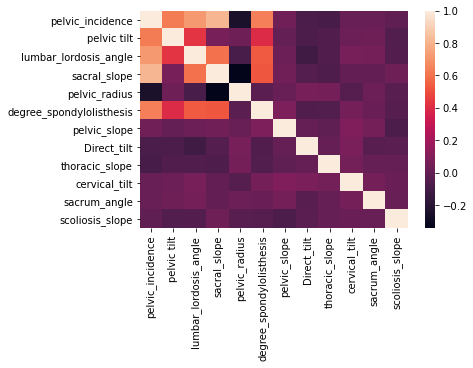

In [29]:
# Multicollinearity check
corr_back = back_data.corr()

sns.heatmap(corr_back)

plt.show()

In [30]:
corr_back

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


In [31]:
# Bivariate Analysis
back_data.groupby('Status').mean()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528711,26.694019


In [32]:
back_data.groupby('Status').median()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,65.274888,18.798899,56.150000,44.639597,115.650323,31.946516,0.501280,21.7506,12.77005,11.973735,-14.892070,24.50940
Normal,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710,0.418732,22.4146,13.40975,11.330750,-13.974694,27.72795


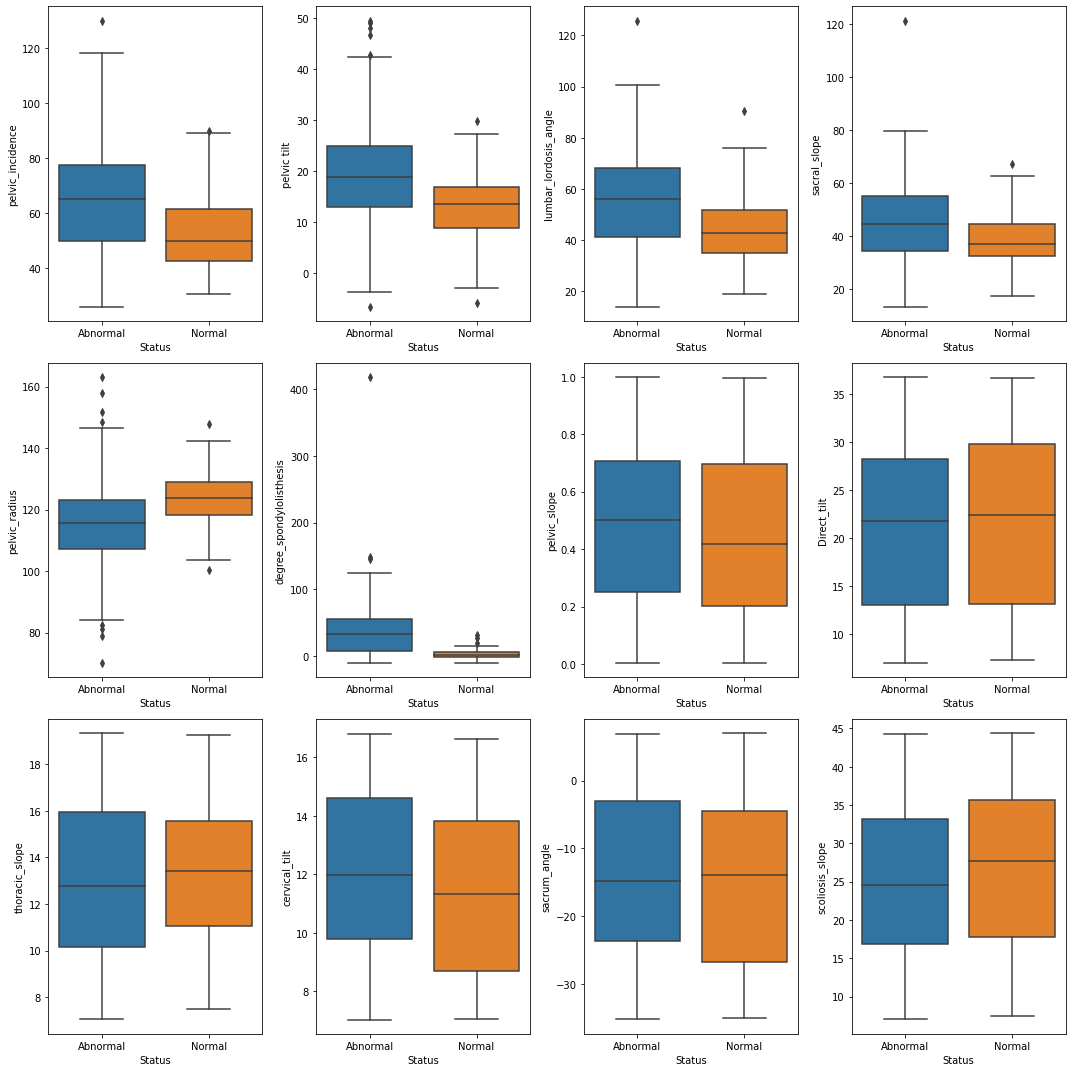

In [34]:
# generating 3 * 4 matrix of box plots
fig, axes = plt.subplots(3,4,figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(back_data.columns)-1):
    sns.boxplot(x="Status", y=back_data.iloc[:,i], data=back_data, orient = 'v',
               ax = axes[i])

plt.tight_layout()
plt.show()

In [35]:
#Categorical variable to numeric variable
back_data.loc[back_data.Status =='Abnormal','Status'] = 1
back_data.loc[back_data.Status == 'Normal', 'Status'] = 0

In [36]:
X = back_data.loc[:,back_data.columns != "Status"]
y = back_data.loc[:,back_data.columns == "Status"]

In [41]:
y=y.astype('int')

In [42]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y.values.ravel(),test_size = 0.3, random_state = 0)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
    
    scaler.fit(X_train)
    
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    return(train_scaled, test_scaled, y_train, y_test)

In [43]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x,y)
    return(logreg)

In [44]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)
logreg_result = logistic_regression(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.876
Test set score: 0.817


In [46]:
logit_model = sm.Logit(y_train,X_train_scaled)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.473055
         Iterations: 35
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.248     
Dependent Variable:   y                 AIC:               229.3058  
Date:                 2021-03-11 19:32  BIC:               269.8646  
No. Observations:     217               Log-Likelihood:    -102.65   
Df Model:             11                LL-Null:           -136.45   
Df Residuals:         205               LLR p-value:       3.4943e-10
Converged:            0.0000            Scale:             1.0000    
No. Iterations:       35.0000                                        
---------------------------------------------------------------------
     Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------
x1   0.0814 11482676.3676  0.0000 1.0000 -22505632.0452 22505632.2080
x2   0.0765  6545064.3181  0.0000 1.0000 -12828090.2

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
# Removing the highly correlated variables
cols_to_include = [cols for cols in X.columns if cols not in ['pelvic_incidence', 'pelvic tilt','sacral_slope']]
X = back_data[cols_to_include]

In [50]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)
logreg_result = logistic_regression(X_train_scaled,y_train)
print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.848
Test set score: 0.753


In [51]:
logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.481933
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.234     
Dependent Variable: y                AIC:              227.1591  
Date:               2021-03-11 20:24 BIC:              257.5781  
No. Observations:   217              Log-Likelihood:   -104.58   
Df Model:           8                LL-Null:          -136.45   
Df Residuals:       208              LLR p-value:      8.5613e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.5434      0.2568    -2.1158    0.0344    -1.0468    -0.0400
x2    -0.9642      0.2080    -4.6364    0.0000    -1.3

In [53]:
# considering only the variables which have p-value less than 0.05
X_trim_1 = X.loc[:,['lumbar_lordosis_angle','pelvic_radius','degree_spondylolisthesis']]

In [54]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim_1,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.857
Test set score: 0.774


In [55]:
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.498420
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.207     
Dependent Variable: y                AIC:              222.3145  
Date:               2021-03-11 20:30 BIC:              232.4542  
No. Observations:   217              Log-Likelihood:   -108.16   
Df Model:           2                LL-Null:          -136.45   
Df Residuals:       214              LLR p-value:      5.1622e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.4688      0.2426    -1.9325    0.0533    -0.9443     0.0067
x2    -0.9188      0.2037    -4.5100    0.0000    -1.3

In [56]:
y_pred = logreg_result.predict(X_test_scaled)
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


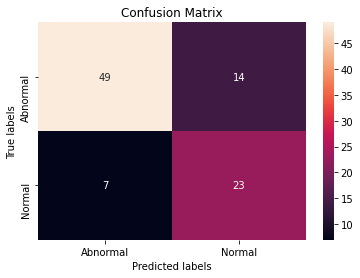

In [57]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
ax = plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Abnormal','Normal']); ax.yaxis.set_ticklabels(['Abnormal','Normal']);
plt.show()